# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Creating Path

path = r"C:\Users\caden\OneDrive\Desktop\Open Source Data Final Project"

In [3]:
# Import Data Set

df = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'Happiness.csv'), index_col = False)

In [4]:
# Checking column names

df.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
# Renaming columns

df.rename(columns = {'Happiness Rank' : 'Rank', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, inplace = True)

In [6]:
df.columns

Index(['Year', 'Country', 'Rank', 'Score', 'Economy', 'Social Support',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
# Check for missing values

df.isnull().sum()

# One N/A value found in data set. Amount in set changed to "0"

Year                 0
Country              0
Rank                 0
Score                0
Economy              0
Social Support       0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [8]:
# Exploring Relationships

df.corr()

,Year,Rank,Score,Economy,Social Support,Health,Freedom,Trust,Generosity,Dystopia Residual
Year,1.000000,-0.039222,0.057607,0.227161,-0.049268,0.009199,0.236854,0.019029,-0.263393,-0.050240
Rank,-0.039222,1.000000,-0.988845,-0.747363,-0.628382,-0.732229,-0.550079,-0.381429,-0.074902,-0.449601
Score,0.057607,-0.988845,1.000000,0.742521,0.628478,0.727705,0.564985,0.405613,0.091253,0.464834
Economy,0.227161,-0.747363,0.742521,1.000000,0.490336,0.704555,0.404940,0.325787,-0.117892,-0.041164
Social Support,-0.049268,-0.628382,0.628478,0.490336,1.000000,0.622250,0.332167,0.128447,0.007670,-0.101908
Health,0.009199,-0.732229,0.727705,0.704555,0.622250,1.000000,0.335558,0.274430,-0.010353,-0.038896
Freedom,0.236854,-0.550079,0.564985,0.404940,0.332167,0.335558,1.000000,0.441697,0.191417,0.066273
Trust,0.019029,-0.381429,0.405613,0.325787,0.128447,0.274430,0.441697,1.000000,0.244556,-0.009033
Generosity,-0.263393,-0.074902,0.091253,-0.117892,0.007670,-0.010353,0.191417,0.244556,1.000000,-0.033337
Dystopia Residual,-0.050240,-0.449601,0.464834,-0.041164,-0.101908,-0.038896,0.066273,-0.009033,-0.033337,1.000000


# 03. Create a Correlation Matrix Heatmap

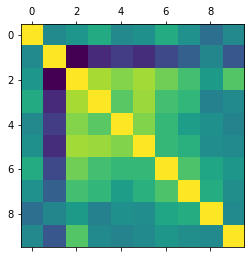

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

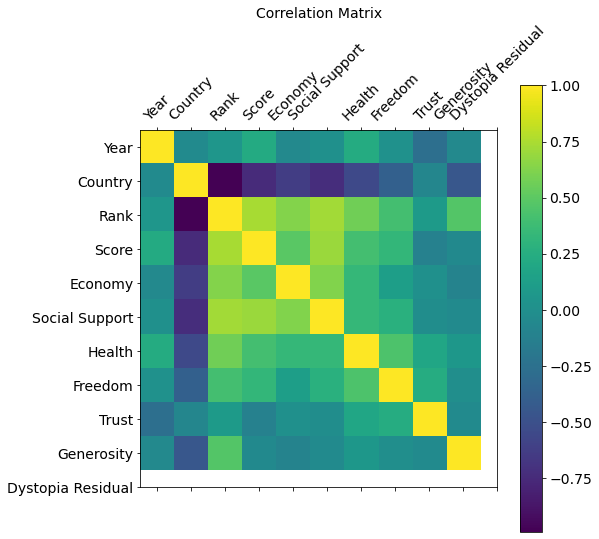

In [10]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [11]:
# Creating subset 

sub = df[['Score', 'Economy', 'Social Support', 'Health','Freedom', 'Trust', 'Generosity', 'Dystopia Residual']]

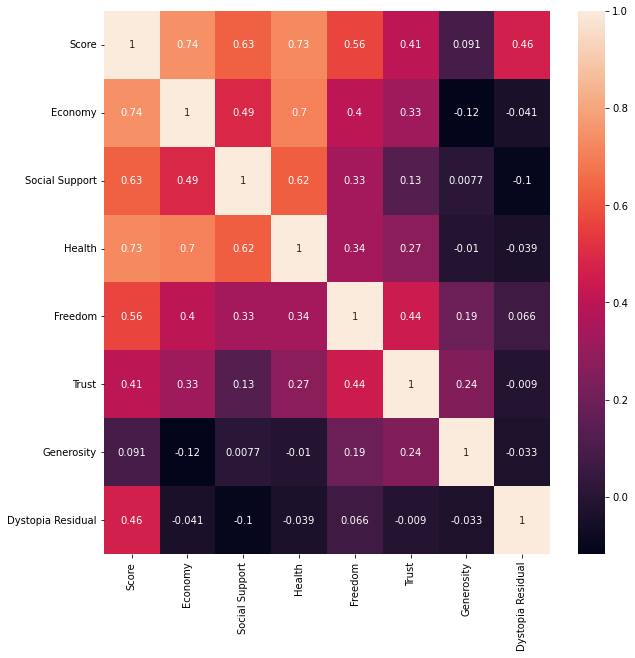

In [12]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

### The lighter colors, mainly from .5 and up represent variables with a strong, positive correlation. Economy, Social Support, Health and Freedom are considered variables with a strong correaltion to a country's score. The darker colors represent weaker correlations, and the negative ones represent a negative correlation. Trust has a moderate, positive correlation and Generosity has a weak one. Dystopia is a hypothetical country which has the lowest scores in all categories and is used for the normalizaton of variables that can't be explained. It generally has a weak or moderate negative correlation.

# 04. Scatterplots

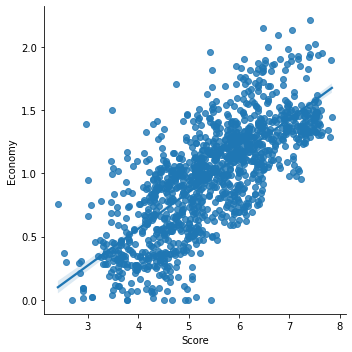

In [13]:
# Scatterplot of variables with strong correlations

sns.lmplot(x = 'Score', y = 'Economy', data = df)

### As Score increases, so too does a country's Economy for the most part. However, there are a few instances where a country's Economy is strong yet their Score is low and vice versa.

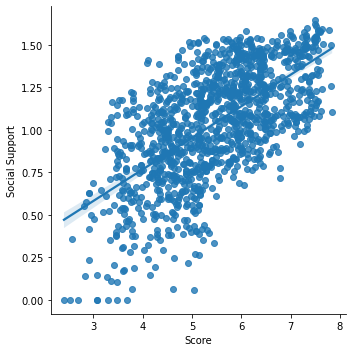

In [14]:
# Scatterplot of variables with strong correlations

sns.lmplot(x = 'Score', y = 'Social Support', data = df)

### Similar to Economy, as Score increases then we typcally see an increase in Social Support, however, there are more outliers with this variable than with Economy.

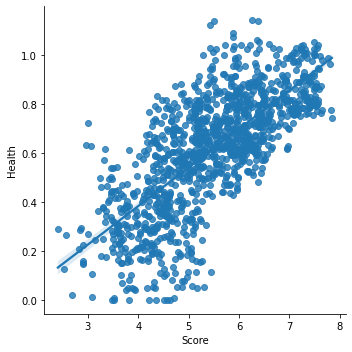

In [15]:
# Scatterplot of variables with strong correlations

sns.lmplot(x = 'Score', y = 'Health', data = df)

### Health seems to be more concetrated around the regression line than Social Support.

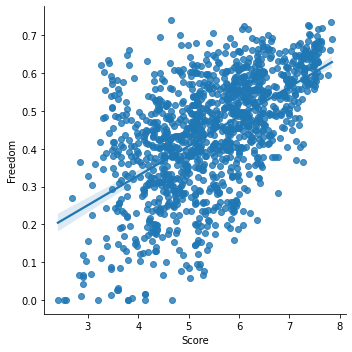

In [16]:
# Scatterplot of variables with strong correlations

sns.lmplot(x = 'Score', y = 'Freedom', data = df)

### It makes sense that as we look at variables with lessening correlation that the points would be less centered around the regression line.

# 05. Pair Plot

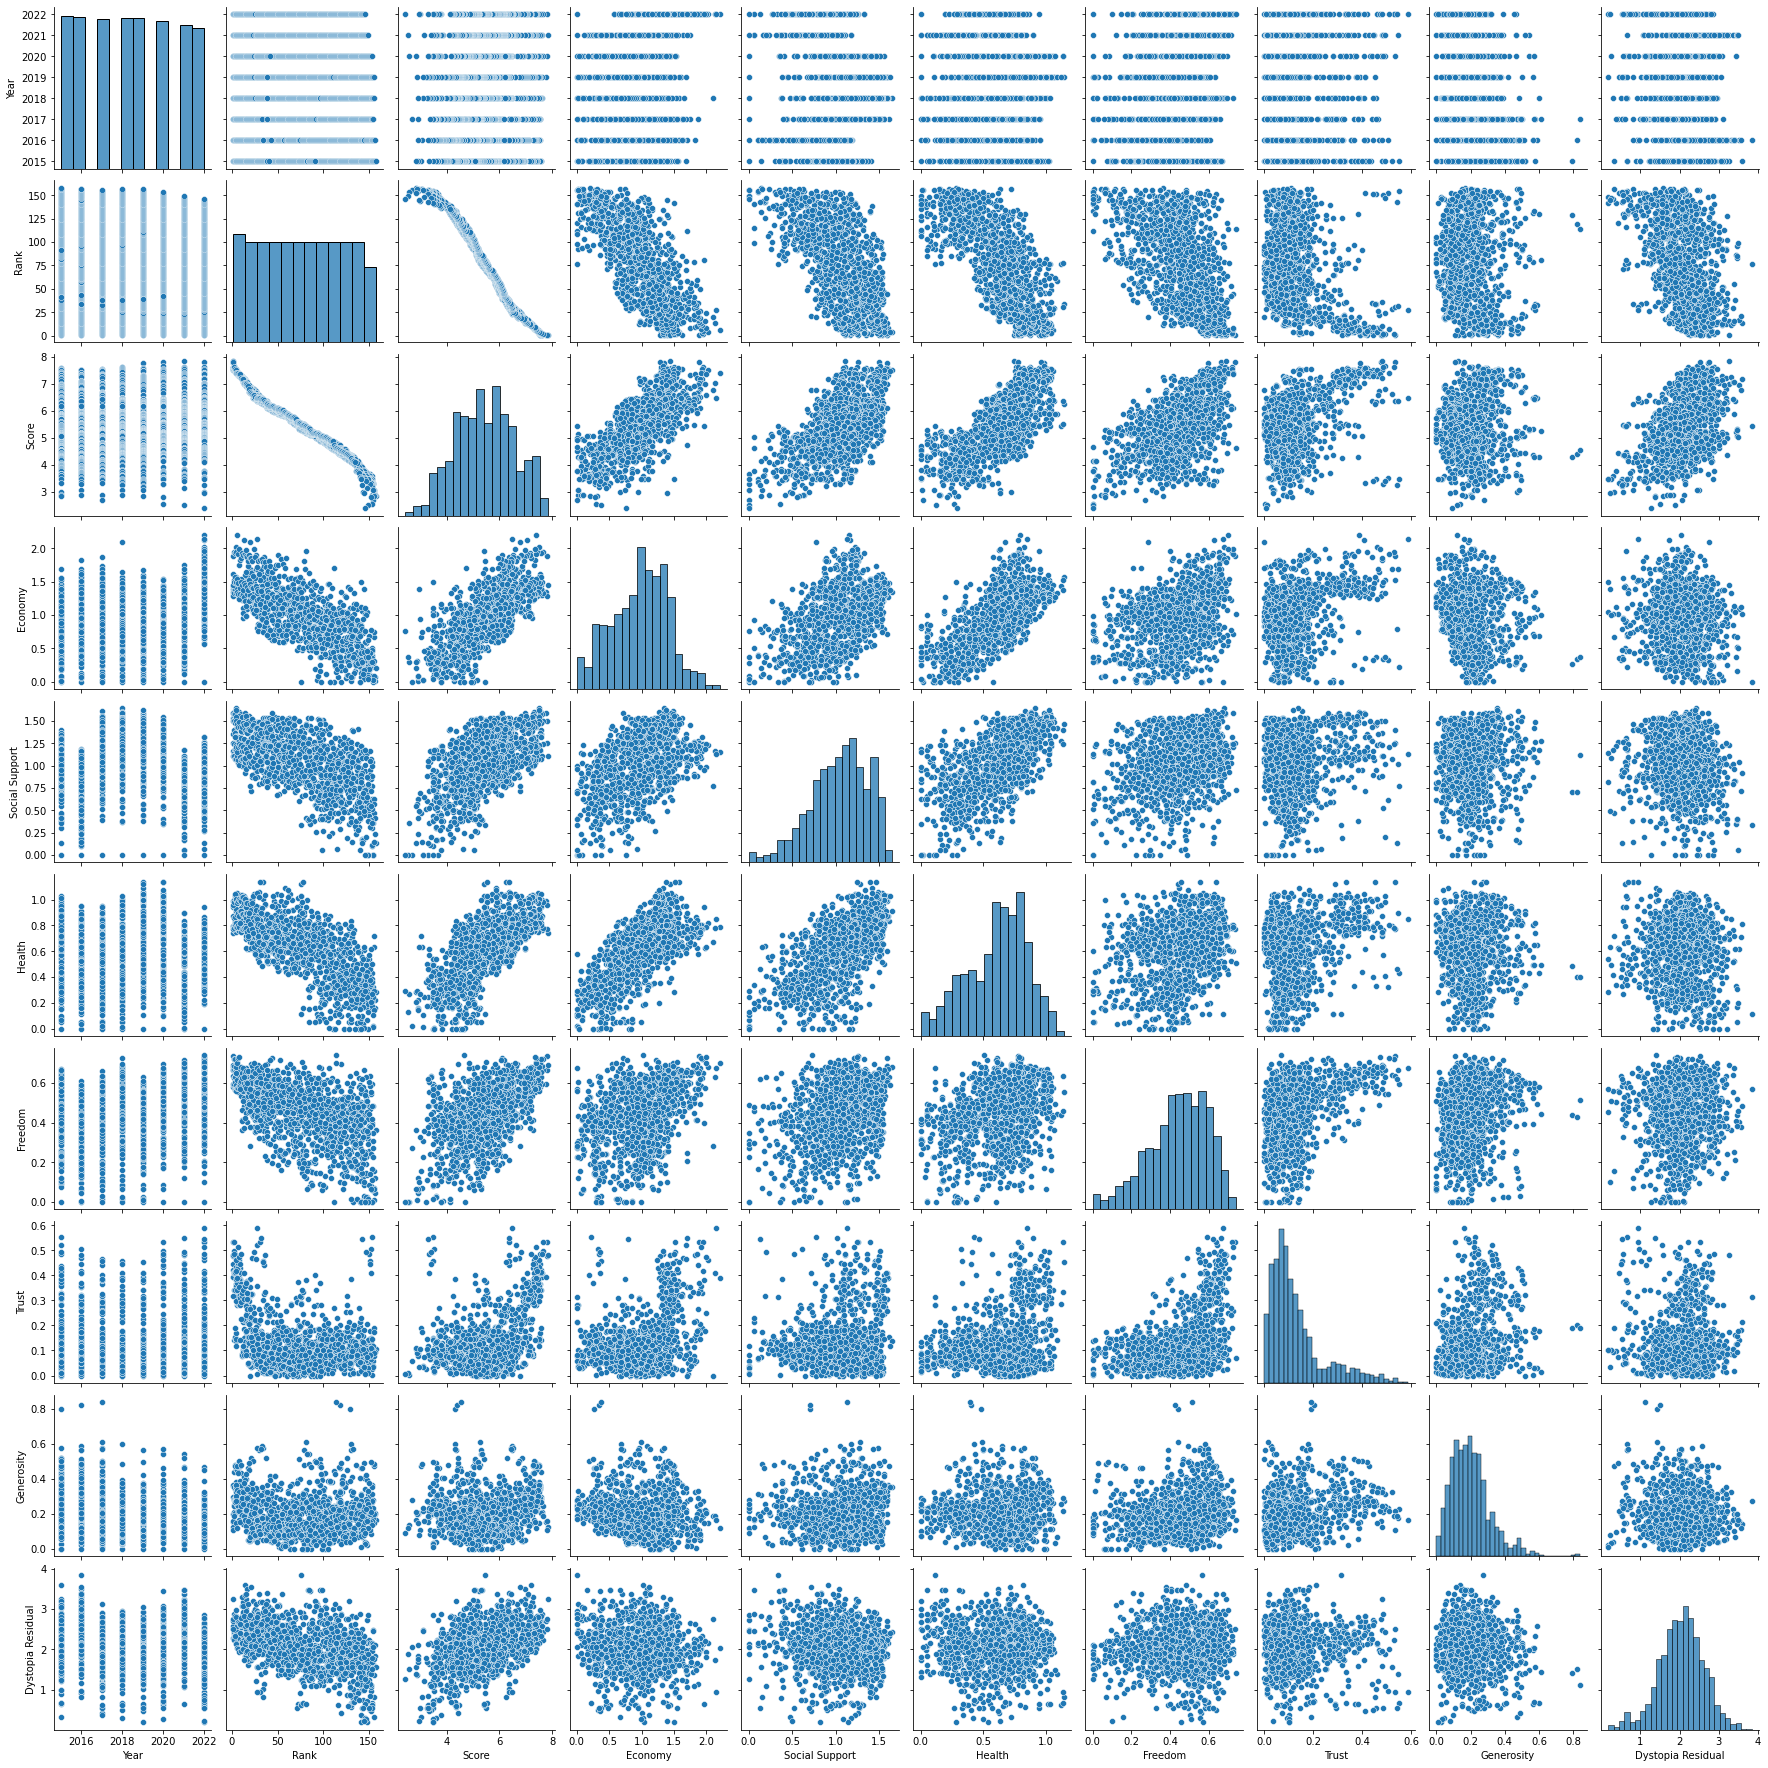

In [17]:
# Create a pair plot

g = sns.pairplot(df)

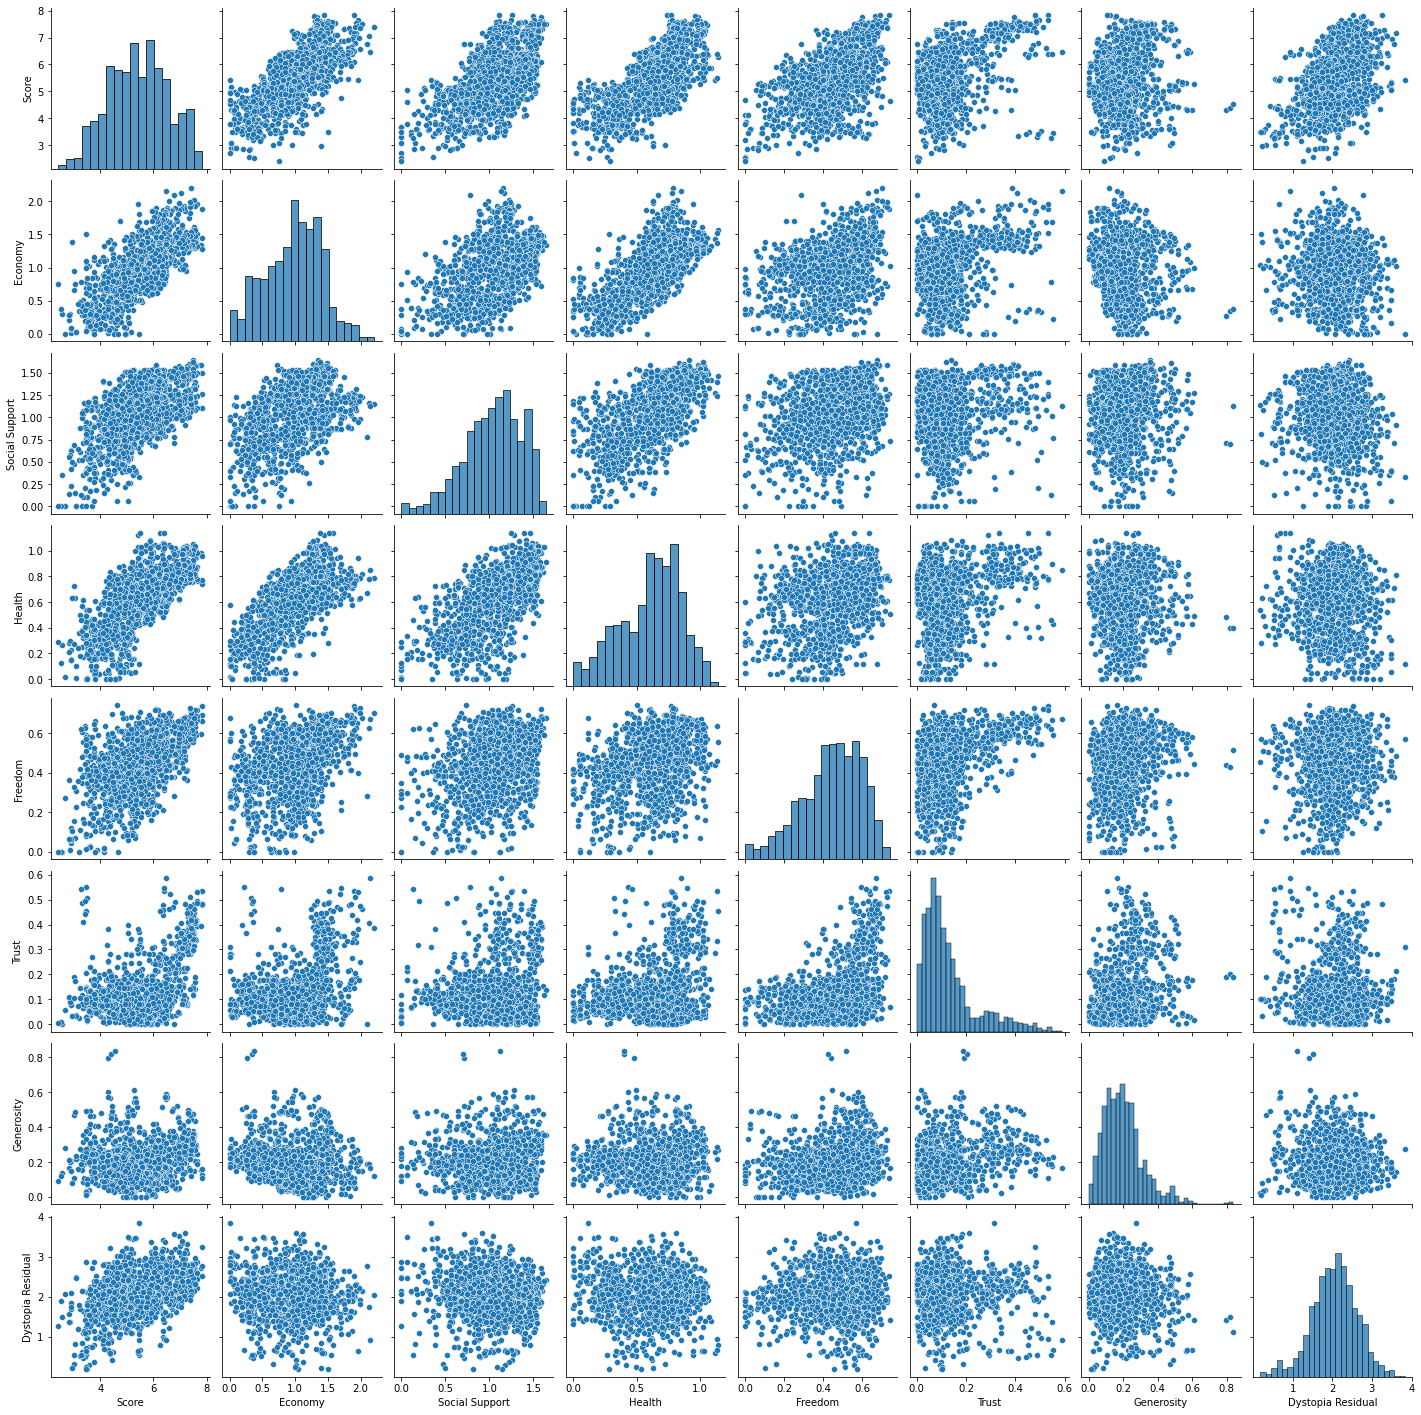

In [18]:
# Create a pair plot

g = sns.pairplot(sub)

### Kind of hard to read, since there is so much to analyze here. As I saw with the scatterplots above, the variables with strong correlations show an upward, positive pattern when compared to a country's Score. Outside of these variables, the rest of them seem to be more random and do not contribute as much to a country's score. I would like to look further into Trust and Generosity to see if there are any patterns to be found between a country's score in these categories as compared to their overall happiness score.

# 06. Categorical Plot

<AxesSubplot:xlabel='Score', ylabel='Count'>

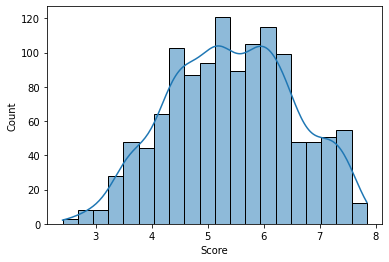

In [19]:
# Use a histogram to visualize the distribution of the variables.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Score'], bins = 20, kde = True)

In [20]:
df.loc[df['Score'] < 4, 'Score Category'] = 'Low Score'

In [21]:
df.loc[(df['Score'] >= 4) & (df['Score'] < 6), 'Score Category'] = 'Medium Score'

In [22]:
df.loc[df['Score'] >= 6, 'Score Category'] = 'High Score'

In [23]:
df['Score Category'].value_counts(dropna = False)

Medium Score    700
High Score      396
Low Score       134
Name: Score Category, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the Score categories created above

sns.set(style="ticks")
g = sns.catplot(x="Score", y="Health", hue="Score Category", data=df)

# 07. Revisiting previous questions

#### Which factor(s) contribute the most to a country’s score? 
#### The variables that contribute the most to positive correlations bewteen score are Economy, Social support, Health and Freedom.

# 08. Hpothesis

### If a country has a high Economy score, then it will have a higher happiness score.

# End